## Statistical Experiments on the data

In [1]:
import pandas
nodes = pandas.read_csv("../nodes_official.csv", parse_dates=['Confirmed On', 'Recovered On', 'Deceased On', 'Discharged On'])
edges = pandas.read_csv("../edges_official.csv")
nodes

,ID,Case,Age,Gender,Nationality,Condition,Transmission,Cluster,Confirmed On,Recovered On,Discharged On,Deceased On
0,MAV00001,MAV00001,49,Female,Turkey,Stable,Local Transmission,NaN,2020-03-07,2020-03-21,2020-03-23,NaT
1,MAV00002,MAV00002,56,Male,South Africa,Stable,Local Transmission,NaN,2020-03-07,2020-03-23,2020-03-23,NaT
2,MAV00003,MAV00003,69,Male,Italy,Stable,Imported,NaN,2020-03-08,2020-03-20,2020-03-31,NaT
3,MAV00004,MAV00004,67,Female,Italy,Stable,Imported,NaN,2020-03-08,2020-03-20,2020-03-31,NaT
4,MAV00005,MAV00005,27,Female,Germany,Stable,Imported,NaN,2020-03-09,2020-03-23,2020-03-29,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
16051,MAV16052,MAV16052,53,Female,Maldives,Stable,Cluster of Cases,HF2204,2021-01-31,NaT,NaT,NaT
16052,MAV16053,MAV16053,25,Male,Maldives,Stable,Cluster of Cases,HL100721B,2021-01-31,NaT,NaT,NaT
16053,MAV16054,MAV16054,36,Female,Maldives,Stable,Cluster of Cases,HF2204,2021-01-31,NaT,NaT,NaT
16054,MAV16055,MAV16055,54,Female,Maldives,Stable,Cluster of Cases,KOLFS1,2021-01-31,NaT,NaT,NaT


#### Cluster Stats

,Cluster,Confirmed On
15618,SROR,2021-01-29
15622,ELNS,2021-01-29
15680,FMRU,2021-01-29
15974,EGAA,2021-01-29
15824,RMEZ,2021-01-30
15822,EFLW,2021-01-30
15839,SKVW,2021-01-30
15835,BERI,2021-01-30
15975,TWNF,2021-01-30
15977,RBUD,2021-01-30


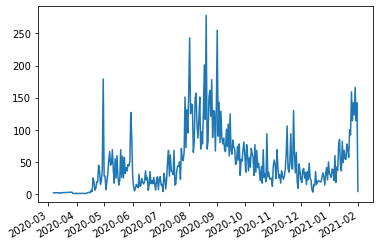

In [14]:
nodes['Confirmed On'].value_counts().plot()

clusters = nodes.sort_values(by=['Confirmed On']).drop_duplicates(subset=['Cluster'])
clusters[['Cluster', 'Confirmed On']][-40:]



#### Network graphing

Dynamic cluster maps

generating 5 frames
2021-01-02
2021-01-02
2021-01-09
2021-01-16
2021-01-23
2021-01-30


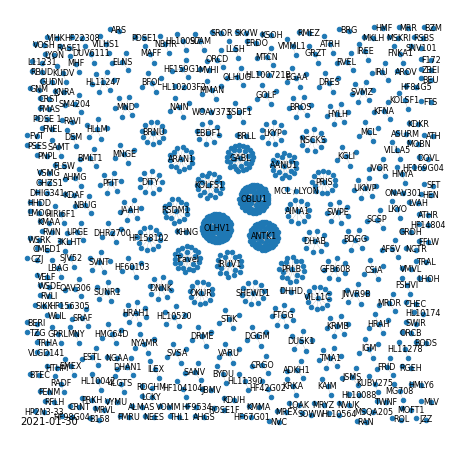

In [19]:
import networkx as nx
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def filter_nodes(timestamp) :
    return nodes[(nodes['Cluster'].notna()) & (nodes['Confirmed On'] <= timestamp) & ((nodes['Recovered On'] >= timestamp) | nodes['Recovered On'].isna()) ]

def draw_date(timestamp):
    df = filter_nodes(timestamp)
    G = nx.Graph()
    labels = {}
    for idx, case in df.iterrows():
        G.add_node(case['ID'])
        if pandas.notna(cluster:=case['Cluster']):
            if cluster not in G:
                G.add_node(cluster)
                labels[cluster] = cluster

            G.add_edge(case['ID'], cluster)

    positions = nx.nx_agraph.pygraphviz_layout(G, prog='neato', args="")
    plt.clf()
    plt.text(0,0, timestamp)
    nx.draw_networkx_labels(G, positions, labels, 8)
    nx.drawing.draw(G, pos=positions, node_size=20, width=0.1)



def dateIter(startDate, endDate, delta=timedelta(weeks=1)):
    currentDate = startDate
    while currentDate < endDate:
        yield currentDate
        currentDate += delta


dates = list(dateIter(date(2021,1,2), datetime.today().date()))

def update(i):
    print(dates[i])
    draw_date(datetime.strftime(dates[i], '%G-%m-%d'))


fig = plt.figure(figsize=(8,8))
print(f"generating {len(dates)} frames")
ani = FuncAnimation(fig, update, interval=500, frames=len(dates), blit=False)
ani.save('stuff.gif', writer='imagemagick', savefig_kwargs={'facecolor':'white'})